# Resource competition: light and Fe in the ACC region of the Southern Ocean

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob

import xarray as xr
import numpy as np

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
import matplotlib.path as mpath
import math
import cmocean

## first, make seasonal-biomass weighted means of temp, Fe, par

#### ACC 1920s

In [2]:
file = '/glade/scratch/kristenk/CESM-LE-output/annual_upper_100m_means_ACC-1920s.nc'
ds_acc_1920s=xr.open_dataset(file)

In [3]:
ds_acc_1920s

<xarray.Dataset>
Dimensions:            ()
Data variables:
    diatC_zint100m     float64 ...
    spC_zint100m       float64 ...
    zooC_zint100m      float64 ...
    spNPP_zint100m     float64 ...
    diatNPP_zint100m   float64 ...
    NPP_zint100m       float64 ...
    zoo_prod_zint100m  float64 ...
    TEMP_100m_mean     float64 ...
    SHF_QSW            float64 ...
    Fe_avg_100m        float64 ...
    phys_med_Fe        float64 ...
    PAR_avg_100m       float64 ...
    TEMP_surf          float64 ...
    PAR_surf           float64 ...

#### ACC 2090s

In [4]:
file = '/glade/scratch/kristenk/CESM-LE-output/annual_upper_100m_means_ACC-2090s.nc'
ds_acc_2090s=xr.open_dataset(file)

#### SIZ 1920s

In [5]:
file = '/glade/scratch/kristenk/CESM-LE-output/annual_upper_100m_means_SIZ-1920s.nc'
ds_siz_1920s=xr.open_dataset(file)

#### SIZ 2090s

In [6]:
file = '/glade/scratch/kristenk/CESM-LE-output/annual_upper_100m_means_SIZ-2090s.nc'
ds_siz_2090s=xr.open_dataset(file)

In [7]:
ds_acc_1920s.PAR_surf

<xarray.DataArray 'PAR_surf' ()>
array(48.675621)
Attributes:
    long_name:     Solar Short-Wave Heat Flux
    units:         watt/m^2
    grid_loc:      2110
    cell_methods:  time: mean

## start work on resource competition, parameter values are from CESM1

#### cycle through values and calculate growth rate for sp and diat, taking difference

# Temp and PAR

### ACC 2090s Fe

In [8]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe = ds_acc_2090s.Fe_avg_100m
Temp_vals_acc = np.arange(0,10,0.1) #(-2,16,0.18)
PAR_vals_acc = np.arange(2,15,0.13)

## initialize empty matrices
sp_growthrate_PART_ACC2090s = np.full((100,100),np.nan)
diat_growthrate_PART_ACC2090s = np.full((100,100),np.nan)

i=0
j=0

for PAR in PAR_vals_acc: # i loop
    
    for T in Temp_vals_acc: # j loop
        
        #calculate tfunc
        Tfunc = q10**((T - Tref) / 10.)
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_PART_ACC2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_PART_ACC2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_PART_ACC2090s = xr.DataArray(sp_growthrate_PART_ACC2090s,dims=('temp_vals','par_vals'))
diat_growthrate_PART_ACC2090s = xr.DataArray(diat_growthrate_PART_ACC2090s,dims=('temp_vals','par_vals'))

In [9]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe = ds_siz_2090s.Fe_avg_100m
Temp_vals_siz = np.arange(-2,1,0.03)
PAR_vals_siz = np.arange(0,10,0.10)

## initialize empty matrices
sp_growthrate_PART_SIZ2090s = np.full((100,100),np.nan)
diat_growthrate_PART_SIZ2090s = np.full((100,100),np.nan)

i=0
j=0

for PAR in PAR_vals_siz: # i loop
    
    for T in Temp_vals_siz: # j loop
        
        #calculate tfunc
        Tfunc = q10**((T - Tref) / 10.)
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_PART_SIZ2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_PART_SIZ2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_PART_SIZ2090s = xr.DataArray(sp_growthrate_PART_SIZ2090s,dims=('temp_vals','par_vals'))
diat_growthrate_PART_SIZ2090s = xr.DataArray(diat_growthrate_PART_SIZ2090s,dims=('temp_vals','par_vals'))

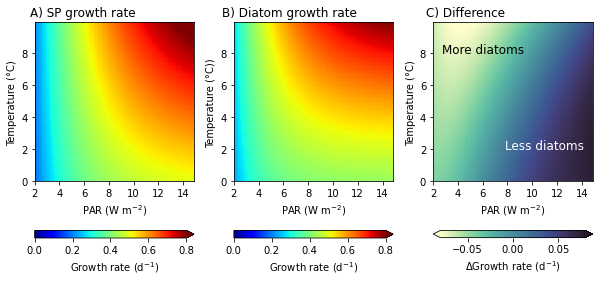

In [10]:
fig = plt.figure(figsize=(10,4.5))

ax = fig.add_subplot(1,3,1)
ax.set_title('A) SP growth rate', x=0.3)
pc=ax.pcolormesh(PAR_vals_acc, Temp_vals_acc, sp_growthrate_PART_ACC2090s,cmap='jet',vmin=0,vmax=0.8)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')
plt.xticks(np.arange(2, 16, 2))
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)',orientation='horizontal',pad=0.2)

ax = fig.add_subplot(1,3,2)
ax.set_title('B) Diatom growth rate', x=0.35)
pc=ax.pcolormesh(PAR_vals_acc, Temp_vals_acc, diat_growthrate_PART_ACC2090s,cmap='jet',vmin=0,vmax=0.8)
ax.set_ylabel('Temperature (°C))')
ax.set_xlabel('PAR (W m$^{-2}$)')
plt.xticks(np.arange(2, 16, 2))
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)',orientation='horizontal',pad=0.2)

ax = fig.add_subplot(1,3,3)
ax.set_title('C) Difference', x=0.2)
pc=ax.pcolormesh(PAR_vals_acc, Temp_vals_acc, sp_growthrate_PART_ACC2090s-diat_growthrate_PART_ACC2090s,cmap=cmocean.cm.deep,vmin=-0.08,vmax=0.08)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')
plt.xticks(np.arange(2, 16, 2))
#cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)',orientation='horizontal')
plt.annotate('More diatoms', (6, 8), fontsize=12,ha='center')
plt.annotate('Less diatoms', (11, 2), fontsize=12,ha='center',color='white')
cbar = fig.colorbar(pc, ax=ax,extend='both',label='${\Delta}$Growth rate (d$^{-1}$)',
                    orientation='horizontal', ticks=[-0.1,-0.05,0,0.05,0.1],pad=0.2)
#cbar.ax.set_yticklabels(['-0.1','-0.05','0','0.05','0.1']) 

plt.subplots_adjust(wspace=0.25)

fig.savefig('/glade/work/kristenk/figs/ex_temp_PAR_resource_comp.png', bbox_inches='tight', dpi=300, format='png');

In [11]:
# SIZ_plotvals_2090s = xr.concat([ds_siz_2090s, ds_siz_2090s.isel(season=0)],dim='season')
# SIZ_plotvals_1920s = xr.concat([ds_siz_1920s, ds_siz_1920s.isel(season=0)],dim='season')
# ACC_plotvals_2090s = xr.concat([ds_acc_2090s, ds_acc_2090s.isel(season=0)],dim='season')
# ACC_plotvals_1920s = xr.concat([ds_acc_1920s, ds_acc_1920s.isel(season=0)],dim='season')
SIZ_plotvals_2090s = ds_siz_2090s #ds_siz_2090s.mean(dim='season')
SIZ_plotvals_1920s = ds_siz_1920s #ds_siz_1920s.mean(dim='season')
ACC_plotvals_2090s = ds_acc_2090s #ds_acc_2090s.mean(dim='season')
ACC_plotvals_1920s = ds_acc_1920s #ds_acc_1920s.mean(dim='season')

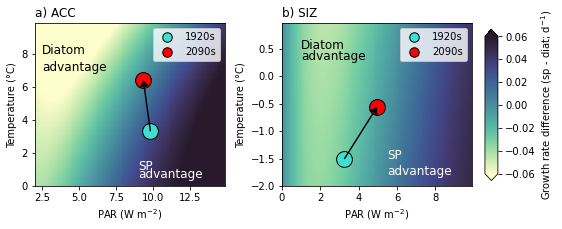

In [12]:
fig = plt.figure(figsize=(9,3))


######################################################### ACC
ax = fig.add_subplot(1,2,1)

ax.set_title('a) ACC', fontsize=12, loc='left')
pc=ax.pcolormesh(PAR_vals_acc, Temp_vals_acc, sp_growthrate_PART_ACC2090s-diat_growthrate_PART_ACC2090s,
                 cmap=cmocean.cm.deep,vmin=-0.06,vmax=0.06)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')

#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_1920s.PAR_avg_100m.values,ACC_plotvals_1920s.TEMP_100m_mean.values,
        marker='o',s=250,color='turquoise',label='1920s', zorder=1,edgecolors='k')

# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_2090s.PAR_avg_100m.values,ACC_plotvals_2090s.TEMP_100m_mean.values,
        marker='o',s=250,color='red',label='2090s',zorder=2,edgecolors='k')

ax.quiver(ACC_plotvals_1920s.PAR_avg_100m.values, ACC_plotvals_1920s.TEMP_100m_mean.values, 
          (ACC_plotvals_2090s.PAR_avg_100m.values-ACC_plotvals_1920s.PAR_avg_100m.values), 
          (ACC_plotvals_2090s.TEMP_100m_mean.values-ACC_plotvals_1920s.TEMP_100m_mean.values), 
          angles='xy', scale_units='xy', scale=1,zorder=2,headwidth=7)

plt.annotate('Diatom', (2.5, 8), fontsize=12,ha='left')
plt.annotate('advantage', (2.5, 7), fontsize=12,ha='left')
plt.annotate('SP', (9, 1), fontsize=12,ha='left',color='white')
plt.annotate('advantage', (9, 0.5), fontsize=12,ha='left',color='white')

ax.legend(loc="upper right",markerscale=0.6,scatterpoints=1, fontsize=10)
#fig.colorbar(pc, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');
#############################################################################

ax = fig.add_subplot(1,2,2)

ax.set_title('b) SIZ',fontsize=12, loc='left')
pc=ax.pcolormesh(PAR_vals_siz, Temp_vals_siz, sp_growthrate_PART_SIZ2090s-diat_growthrate_PART_SIZ2090s,
                 cmap=cmocean.cm.deep,vmin=-0.06,vmax=0.06)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')

#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_1920s.PAR_avg_100m.values,SIZ_plotvals_1920s.TEMP_100m_mean.values,
        marker='o',s=250,color='turquoise',label='1920s', zorder=1,edgecolors='k')


# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_2090s.PAR_avg_100m.values,SIZ_plotvals_2090s.TEMP_100m_mean.values,
        marker='o',s=250,color='red',label='2090s',zorder=2,edgecolors='k')

ax.quiver(SIZ_plotvals_1920s.PAR_avg_100m.values, SIZ_plotvals_1920s.TEMP_100m_mean.values, 
          (SIZ_plotvals_2090s.PAR_avg_100m.values-SIZ_plotvals_1920s.PAR_avg_100m.values), 
          (SIZ_plotvals_2090s.TEMP_100m_mean.values-SIZ_plotvals_1920s.TEMP_100m_mean.values), 
          angles='xy', scale_units='xy', scale=1,zorder=2,headwidth=7)

plt.annotate('Diatom', (1, 0.5), fontsize=12,ha='left')
plt.annotate('advantage', (1, 0.3), fontsize=12,ha='left')
plt.annotate('SP', (5.5, -1.5), fontsize=12,ha='left',color='white')
plt.annotate('advantage', (5.5, -1.8), fontsize=12,ha='left',color='white')

ax.legend(loc="upper right",markerscale=0.6,scatterpoints=1, fontsize=10)

#fig.colorbar(pc, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

fig.subplots_adjust(wspace=0.3)
### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

fig.savefig('/glade/work/kristenk/figs/TEMP_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');

In [13]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe_vals_siz2 = np.arange(0.00018,0.00025,0.0000007)
PAR_vals_siz2 = np.arange(0,8,0.08)
T = ds_siz_2090s.TEMP_100m_mean

#calculate tfunc
Tfunc = q10**((T - Tref) / 10.)

## initialize empty matrices
sp_growthrate_SIZ2090s = np.full((100,100),np.nan)
diat_growthrate_SIZ2090s = np.full((100,100),np.nan)

i=0
j=0

for Fe in Fe_vals_siz2: # i loop
    
    for PAR in PAR_vals_siz2: # j loop
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_SIZ2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_SIZ2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_SIZ2090s = xr.DataArray(sp_growthrate_SIZ2090s,dims=('par_vals','fe_vals'))
diat_growthrate_SIZ2090s = xr.DataArray(diat_growthrate_SIZ2090s,dims=('par_vals','fe_vals'))

In [19]:
### Specify parameters
Tref = 30.
q10 = 2.0

alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

kFe_diat = 8.e-5
kFe_sp = 3.e-5

## PAR and Fe ranges and temperature
Fe_vals_acc2 = np.arange(0.00017,0.00022,0.0000005)
PAR_vals_acc2 = np.arange(8,12,0.04)
T = ds_acc_2090s.TEMP_100m_mean

#calculate tfunc
Tfunc = q10**((T - Tref) / 10.)

## initialize empty matrices
sp_growthrate_ACC2090s = np.full((100,100),np.nan)
diat_growthrate_ACC2090s = np.full((100,100),np.nan)

i=0
j=0

for Fe in Fe_vals_acc2: # i loop
    
    for PAR in PAR_vals_acc2: # j loop
        
        ### temperature adjusted max growth rate
        max_gr = PCref_sp * Tfunc 
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (max_gr * sp_nut_lim))
        
        sp_growthrate_ACC2090s[j,i] = max_gr * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (max_gr * diat_nut_lim))
        
        diat_growthrate_ACC2090s[j,i] = max_gr * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_growthrate_ACC2090s = xr.DataArray(sp_growthrate_ACC2090s,dims=('par_vals','fe_vals'))
diat_growthrate_ACC2090s = xr.DataArray(diat_growthrate_ACC2090s,dims=('par_vals','fe_vals'))

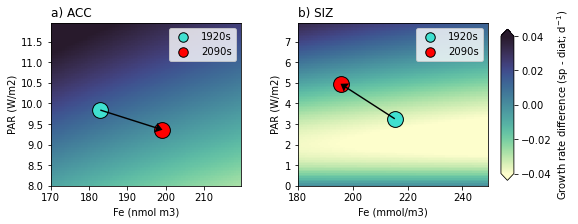

In [24]:
fig = plt.figure(figsize=(9,3))


######################################################### ACC
ax = fig.add_subplot(1,2,1)

ax.set_title('a) ACC', fontsize=12, loc='left')
pc=ax.pcolormesh(Fe_vals_acc2, PAR_vals_acc2, sp_growthrate_ACC2090s-diat_growthrate_ACC2090s,
                 cmap=cmocean.cm.deep,vmin=-0.04,vmax=0.04)
ax.set_ylabel('PAR (W/m2)')
ax.set_xlabel('Fe (nmol m3)')
labels = ['170','180','190','200','210']
ax.set_xticklabels(labels)
#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_1920s.Fe_avg_100m.values,ACC_plotvals_1920s.PAR_avg_100m.values,
        marker='o',s=250,color='turquoise',label='1920s', zorder=1,edgecolors='k')

# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_2090s.Fe_avg_100m.values,ACC_plotvals_2090s.PAR_avg_100m.values,
        marker='o',s=250,color='red',label='2090s',zorder=2,edgecolors='k')

ax.quiver(ACC_plotvals_1920s.Fe_avg_100m.values, ACC_plotvals_1920s.PAR_avg_100m.values, 
          (ACC_plotvals_2090s.Fe_avg_100m.values-ACC_plotvals_1920s.Fe_avg_100m.values), 
          (ACC_plotvals_2090s.PAR_avg_100m.values-ACC_plotvals_1920s.PAR_avg_100m.values), 
          angles='xy', scale_units='xy', scale=1,zorder=2,headwidth=7)

# plt.annotate('Diatom', (2.5, 8), fontsize=12,ha='left')
# plt.annotate('advantage', (2.5, 7), fontsize=12,ha='left')
# plt.annotate('SP', (9, 1), fontsize=12,ha='left',color='white')
# plt.annotate('advantage', (9, 0.5), fontsize=12,ha='left',color='white')

ax.legend(loc="upper right",markerscale=0.6,scatterpoints=1, fontsize=10)
#fig.colorbar(pc, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');
#############################################################################

ax = fig.add_subplot(1,2,2)

ax.set_title('b) SIZ',fontsize=12, loc='left')
pc=ax.pcolormesh(Fe_vals_siz2, PAR_vals_siz2, sp_growthrate_SIZ2090s-diat_growthrate_SIZ2090s,
                 cmap=cmocean.cm.deep,vmin=-0.04,vmax=0.04)
ax.set_ylabel('PAR (W/m2)')
ax.set_xlabel('Fe (mmol/m3)')
labels = ['180','200','220','240']
ax.set_xticklabels(labels)
#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_1920s.Fe_avg_100m.values,SIZ_plotvals_1920s.PAR_avg_100m.values,
        marker='o',s=250,color='turquoise',label='1920s', zorder=1,edgecolors='k')


# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_2090s.Fe_avg_100m.values,SIZ_plotvals_2090s.PAR_avg_100m.values,
        marker='o',s=250,color='red',label='2090s',zorder=2,edgecolors='k')

ax.quiver(SIZ_plotvals_1920s.Fe_avg_100m.values, SIZ_plotvals_1920s.PAR_avg_100m.values, 
          (SIZ_plotvals_2090s.Fe_avg_100m.values-SIZ_plotvals_1920s.Fe_avg_100m.values), 
          (SIZ_plotvals_2090s.PAR_avg_100m.values-SIZ_plotvals_1920s.PAR_avg_100m.values), 
          angles='xy', scale_units='xy', scale=1,zorder=2,headwidth=7)

# plt.annotate('Diatom', (1, 0.5), fontsize=12,ha='left')
# plt.annotate('advantage', (1, 0.3), fontsize=12,ha='left')
# plt.annotate('SP', (5.5, -1.5), fontsize=12,ha='left',color='white')
# plt.annotate('advantage', (5.5, -1.8), fontsize=12,ha='left',color='white')

ax.legend(loc="upper right",markerscale=0.6,scatterpoints=1, fontsize=10)

# #fig.colorbar(pc, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

fig.subplots_adjust(wspace=0.3)
### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

# #fig.savefig('/glade/work/kristenk/figs/TEMP_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');

In [22]:
Fe_vals_acc2

array([0.00017  , 0.0001705, 0.000171 , 0.0001715, 0.000172 , 0.0001725,
       0.000173 , 0.0001735, 0.000174 , 0.0001745, 0.000175 , 0.0001755,
       0.000176 , 0.0001765, 0.000177 , 0.0001775, 0.000178 , 0.0001785,
       0.000179 , 0.0001795, 0.00018  , 0.0001805, 0.000181 , 0.0001815,
       0.000182 , 0.0001825, 0.000183 , 0.0001835, 0.000184 , 0.0001845,
       0.000185 , 0.0001855, 0.000186 , 0.0001865, 0.000187 , 0.0001875,
       0.000188 , 0.0001885, 0.000189 , 0.0001895, 0.00019  , 0.0001905,
       0.000191 , 0.0001915, 0.000192 , 0.0001925, 0.000193 , 0.0001935,
       0.000194 , 0.0001945, 0.000195 , 0.0001955, 0.000196 , 0.0001965,
       0.000197 , 0.0001975, 0.000198 , 0.0001985, 0.000199 , 0.0001995,
       0.0002   , 0.0002005, 0.000201 , 0.0002015, 0.000202 , 0.0002025,
       0.000203 , 0.0002035, 0.000204 , 0.0002045, 0.000205 , 0.0002055,
       0.000206 , 0.0002065, 0.000207 , 0.0002075, 0.000208 , 0.0002085,
       0.000209 , 0.0002095, 0.00021  , 0.0002105, 

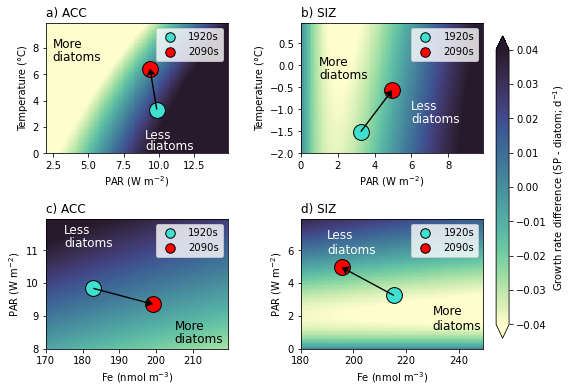

In [26]:
fig = plt.figure(figsize=(9,6))


######################################################### ACC
ax = fig.add_subplot(2,2,1)

ax.set_title('a) ACC', fontsize=12, loc='left')
pc=ax.pcolormesh(PAR_vals_acc, Temp_vals_acc, sp_growthrate_PART_ACC2090s-diat_growthrate_PART_ACC2090s,
                 cmap=cmocean.cm.deep,vmin=-0.04,vmax=0.04)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')

#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_1920s.PAR_avg_100m.values,ACC_plotvals_1920s.TEMP_100m_mean.values,
        marker='o',s=250,color='turquoise',label='1920s', zorder=1,edgecolors='k')

# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_2090s.PAR_avg_100m.values,ACC_plotvals_2090s.TEMP_100m_mean.values,
        marker='o',s=250,color='red',label='2090s',zorder=2,edgecolors='k')

ax.quiver(ACC_plotvals_1920s.PAR_avg_100m.values, ACC_plotvals_1920s.TEMP_100m_mean.values, 
          (ACC_plotvals_2090s.PAR_avg_100m.values-ACC_plotvals_1920s.PAR_avg_100m.values), 
          (ACC_plotvals_2090s.TEMP_100m_mean.values-ACC_plotvals_1920s.TEMP_100m_mean.values), 
          angles='xy', scale_units='xy', scale=1,zorder=2,headwidth=7)

plt.annotate('More', (2.5, 8), fontsize=12,ha='left')
plt.annotate('diatoms', (2.5, 7), fontsize=12,ha='left')
plt.annotate('Less', (9, 1.1), fontsize=12,ha='left',color='white')
plt.annotate('diatoms', (9, 0.3), fontsize=12,ha='left',color='white')

ax.legend(loc="upper right",markerscale=0.6,scatterpoints=1, fontsize=10)
#fig.colorbar(pc, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');
#############################################################################

ax = fig.add_subplot(2,2,2)

ax.set_title('b) SIZ',fontsize=12, loc='left')
pc=ax.pcolormesh(PAR_vals_siz, Temp_vals_siz, sp_growthrate_PART_SIZ2090s-diat_growthrate_PART_SIZ2090s,
                 cmap=cmocean.cm.deep,vmin=-0.04,vmax=0.04)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('PAR (W m$^{-2}$)')

#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_1920s.PAR_avg_100m.values,SIZ_plotvals_1920s.TEMP_100m_mean.values,
        marker='o',s=250,color='turquoise',label='1920s', zorder=1,edgecolors='k')


# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_2090s.PAR_avg_100m.values,SIZ_plotvals_2090s.TEMP_100m_mean.values,
        marker='o',s=250,color='red',label='2090s',zorder=2,edgecolors='k')

ax.quiver(SIZ_plotvals_1920s.PAR_avg_100m.values, SIZ_plotvals_1920s.TEMP_100m_mean.values, 
          (SIZ_plotvals_2090s.PAR_avg_100m.values-SIZ_plotvals_1920s.PAR_avg_100m.values), 
          (SIZ_plotvals_2090s.TEMP_100m_mean.values-SIZ_plotvals_1920s.TEMP_100m_mean.values), 
          angles='xy', scale_units='xy', scale=1,zorder=2,headwidth=7)

plt.annotate('More', (1, 0.0), fontsize=12,ha='left')
plt.annotate('diatoms', (1, -0.3), fontsize=12,ha='left')
plt.annotate('Less', (6, -1), fontsize=12,ha='left',color='white')
plt.annotate('diatoms', (6, -1.3), fontsize=12,ha='left',color='white')

ax.legend(loc="upper right",markerscale=0.6,scatterpoints=1, fontsize=10)

#fig.colorbar(pc, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

# fig.subplots_adjust(wspace=0.3)
# ### color base
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
# fig.colorbar(pc, cax=cbar_ax, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');


######################################################### ACC
ax = fig.add_subplot(2,2,3)

ax.set_title('c) ACC', fontsize=12, loc='left')
pc=ax.pcolormesh(Fe_vals_acc2, PAR_vals_acc2, sp_growthrate_ACC2090s-diat_growthrate_ACC2090s,
                 cmap=cmocean.cm.deep,vmin=-0.04,vmax=0.04)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('Fe (nmol m$^{-3}$)')

labels = ['170','180','190','200','210']
ax.set_xticklabels(labels)
#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_1920s.Fe_avg_100m.values,ACC_plotvals_1920s.PAR_avg_100m.values,
        marker='o',s=250,color='turquoise',label='1920s', zorder=1,edgecolors='k')

# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_2090s.Fe_avg_100m.values,ACC_plotvals_2090s.PAR_avg_100m.values,
        marker='o',s=250,color='red',label='2090s',zorder=2,edgecolors='k')

ax.quiver(ACC_plotvals_1920s.Fe_avg_100m.values, ACC_plotvals_1920s.PAR_avg_100m.values, 
          (ACC_plotvals_2090s.Fe_avg_100m.values-ACC_plotvals_1920s.Fe_avg_100m.values), 
          (ACC_plotvals_2090s.PAR_avg_100m.values-ACC_plotvals_1920s.PAR_avg_100m.values), 
          angles='xy', scale_units='xy', scale=1,zorder=2,headwidth=7)

plt.annotate('More', (0.000205, 8.6), fontsize=12,ha='left')
plt.annotate('diatoms', (0.000205, 8.2), fontsize=12,ha='left')
plt.annotate('Less', (0.000175, 11.5), fontsize=12,ha='left',color='white')
plt.annotate('diatoms', (0.000175, 11.1), fontsize=12,ha='left',color='white')

ax.legend(loc="upper right",markerscale=0.6,scatterpoints=1, fontsize=10)
#fig.colorbar(pc, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');
#############################################################################

ax = fig.add_subplot(2,2,4)

ax.set_title('d) SIZ',fontsize=12, loc='left')
pc=ax.pcolormesh(Fe_vals_siz2, PAR_vals_siz2, sp_growthrate_SIZ2090s-diat_growthrate_SIZ2090s,
                 cmap=cmocean.cm.deep,vmin=-0.04,vmax=0.04)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('Fe (nmol m$^{-3}$)')
labels = ['180','200','220','240']
ax.set_xticklabels(labels)
#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_1920s.Fe_avg_100m.values,SIZ_plotvals_1920s.PAR_avg_100m.values,
        marker='o',s=250,color='turquoise',label='1920s', zorder=1,edgecolors='k')


# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_2090s.Fe_avg_100m.values,SIZ_plotvals_2090s.PAR_avg_100m.values,
        marker='o',s=250,color='red',label='2090s',zorder=2,edgecolors='k')

ax.quiver(SIZ_plotvals_1920s.Fe_avg_100m.values, SIZ_plotvals_1920s.PAR_avg_100m.values, 
          (SIZ_plotvals_2090s.Fe_avg_100m.values-SIZ_plotvals_1920s.Fe_avg_100m.values), 
          (SIZ_plotvals_2090s.PAR_avg_100m.values-SIZ_plotvals_1920s.PAR_avg_100m.values), 
          angles='xy', scale_units='xy', scale=1,zorder=2,headwidth=7)

plt.annotate('More', (0.000230, 2.1), fontsize=12,ha='left')
plt.annotate('diatoms', (0.000230, 1.2), fontsize=12,ha='left')
plt.annotate('Less', (0.000190, 6.7), fontsize=12,ha='left',color='white')
plt.annotate('diatoms', (0.000190, 5.8), fontsize=12,ha='left',color='white')

ax.legend(loc="upper right",markerscale=0.6,scatterpoints=1, fontsize=10)

# #fig.colorbar(pc, extend='both', label='Growth rate difference (sp - diat; d$^{-1}$)');

fig.subplots_adjust(wspace=0.4,hspace=0.5)
### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, extend='both', label='Growth rate difference (SP - diatom; d$^{-1}$)');




fig.savefig('/glade/work/kristenk/figs/four-panel_resource_competition.png', bbox_inches='tight', dpi=300, format='png');